In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# configure df options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:,.5f}'.format

### Read true raw samples

In [3]:
df = pd.read_csv('../../../dataset/final/bentre-cleaned.csv', parse_dates=['date'])

In [4]:
df.set_index('date', inplace=True)

In [5]:
# sort by date index
df.sort_index(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15106 entries, 2002-01-01 to 2018-05-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    15106 non-null  object 
 1   min     15010 non-null  float64
 2   max     15106 non-null  float64
 3   x       13596 non-null  float64
 4   y       13596 non-null  float64
 5   cm      13596 non-null  float64
dtypes: float64(5), object(1)
memory usage: 826.1+ KB


In [7]:
df.head()

,code,min,max,x,y,cm
date,,,,,,
2002-01-01,ANTHUAN,3.50000,6.00000,106.57215,9.99752,0.00000
2002-01-01,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-01,SONDOC,0.10000,0.30000,106.52635,10.02522,30.48000
2002-01-01,BENTRAI,0.20000,1.00000,106.53715,9.87584,0.00000
2002-01-01,BINHDAI,0.50000,2.00000,106.69681,10.20635,152.40000


In [8]:
df.tail()

,code,min,max,x,y,cm
date,,,,,,
2018-05-31,MOCAY,0.10000,0.10000,106.28399,10.08130,670.56000
2018-05-31,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2018-05-31,PHUOCLONG,0.10000,0.10000,106.40969,10.13223,396.24000
2018-05-31,TANTHIENG,0.00000,0.00000,106.21894,10.15931,518.16000
2018-05-31,SONPHU,0.00000,0.00000,106.38150,10.17611,731.52000


#### Reread prepared test samples

In [9]:
data_points = df['code'].value_counts()

data_points

SONDOC             2271
LOCTHUAN           2154
BENTRAI            2108
BINHDAI            2108
ANTHUAN            2108
MYHOA               308
TICHTHIEN           302
TIENTHUY            302
TANTHIENG           302
MOCAY               302
PHUOCLONG           302
GIAOHOA             182
LANGTHE             151
CAMSON              151
HUNGKHANHTRUNGB     151
THANHTHOIA          151
MYVAN               151
TRACU               151
VUNGLIEM            151
VANGQUOITAY         151
CAIMIT              151
CAIHOP              151
CONGNANGAM          151
SONPHU              151
MYTHANH             151
BENCHUA             151
RACHRUM             151
HUONGMY              92
Name: code, dtype: int64

In [10]:
# save all station codes sorted by number of samples
data_points.to_csv(f'../../data/station/stations.csv', columns=[], index=True, index_label='code')

In [11]:
# get all station codes sorted by number of samples
station_codes = data_points.index

station_codes

Index(['SONDOC', 'LOCTHUAN', 'BENTRAI', 'BINHDAI', 'ANTHUAN', 'MYHOA',
       'TICHTHIEN', 'TIENTHUY', 'TANTHIENG', 'MOCAY', 'PHUOCLONG', 'GIAOHOA',
       'LANGTHE', 'CAMSON', 'HUNGKHANHTRUNGB', 'THANHTHOIA', 'MYVAN', 'TRACU',
       'VUNGLIEM', 'VANGQUOITAY', 'CAIMIT', 'CAIHOP', 'CONGNANGAM', 'SONPHU',
       'MYTHANH', 'BENCHUA', 'RACHRUM', 'HUONGMY'],
      dtype='object')

### Experiment the code on one station of a specific year (JUMP TO FULL IMPLEMENTATION)

In [12]:
station_code = 'BINHDAI'
test_year = 2012

In [13]:
test_df = df[(df['code'] == station_code) & (df.index.year == test_year)][['code', 'min', 'max']]

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2012-02-01 to 2012-06-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    63 non-null     object 
 1   min     63 non-null     float64
 2   max     63 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [15]:
test_df.head()

,code,min,max
date,,,
2012-02-01,BINHDAI,0.77500,11.25000
2012-02-02,BINHDAI,0.92500,14.67500
2012-02-03,BINHDAI,2.12500,16.37500
2012-02-09,BINHDAI,3.80000,16.30000
2012-02-10,BINHDAI,3.40000,17.87500


In [16]:
test_df.tail()

,code,min,max
date,,,
2012-06-24,BINHDAI,1.25000,10.77500
2012-06-25,BINHDAI,0.30000,12.05000
2012-06-27,BINHDAI,0.80000,14.00000
2012-06-28,BINHDAI,2.10000,13.35000
2012-06-29,BINHDAI,1.42500,16.75000


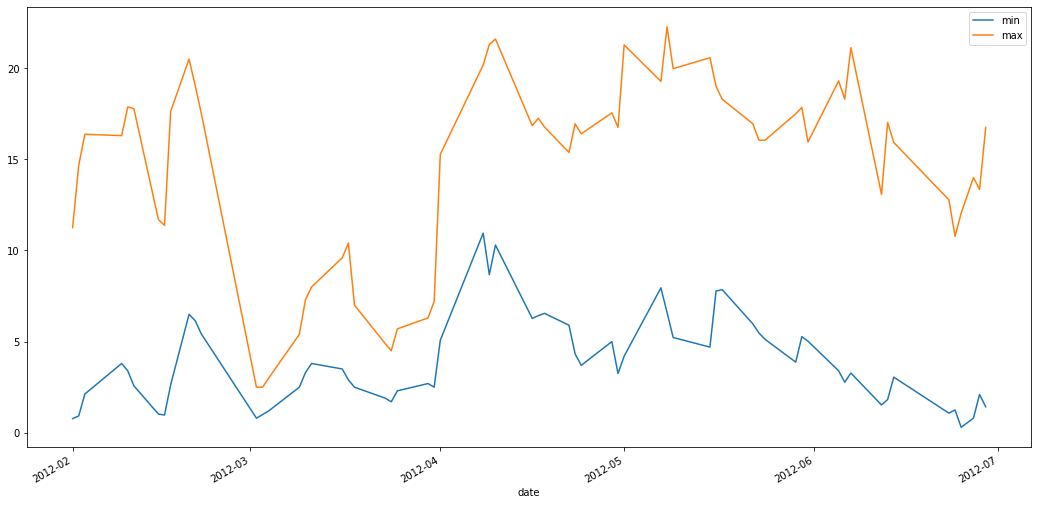

In [17]:
# plot
test_df[['min', 'max']].plot(figsize=(18, 9), legend=True);

In [18]:
# save test dataset
test_df.to_csv(f'../../data/evaluation/{station_code}-{test_year}.csv', index=True, index_label='date')

### Full Implementation

In [19]:
# station samples by year
for station_code in station_codes:
    for test_year in range(2011, 2019):
        test_df = df[(df['code'] == station_code) & (df.index.year == test_year)][['code', 'min', 'max']]
        if len(test_df) > 0:
            test_df.to_csv(f'../../data/evaluation/{station_code}-{test_year}.csv', index=True, index_label='date')